In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import Imputer,LabelEncoder,MinMaxScaler

In [2]:
PATH = os.getcwd()

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '90-10_submissions',
 'AllStationsData_PHD.txt',
 'allvars_xgb_bestThreshold.csv',
 'Attribute_Information.pdf',
 'BATCH_39_PHD_VIVA_SCHEDULE.pdf',
 'BATCH_39_PHD_VIVA_SCHEDULE_updated.pdf',
 'ML_Problem_statement.pdf',
 'ML_Task01_submission',
 'ML_Task02_submission',
 'Models-Origin-Destination-Merge-RfImp.ipynb',
 'Models-Origin-Destination-Merge.ipynb',
 'Models_OriginMergeOnly.ipynb',
 'Phd_1864B39_ML_Preprocessing.ipynb',
 'Phd_1864B39_Models.ipynb',
 'Phd_MLTask_1864B39_Visualization.ipynb',
 'Preprocessing_Visualization.docx',
 'Results_Phd.xlsx',
 'sampleSubmission.csv',
 'submission_ada_basic.csv',
 'submission_dt1_origdest.csv',
 'submission_orig',
 'submission_origdest',
 'submission_rf_basic_origdest.csv',
 'submission_rf_tuned_origdest.csv',
 'submission_xgb_bestThreshold.csv',
 'submission_xgb_best_origdest.csv',
 'submission_xgb_toprf20.csv',
 'sub_best20_origdest.csv',
 'sub_rf_imp15.csv',
 'sub_rf_imp20.csv',
 'Target Derivation.ipynb',
 'Test.

In [4]:
trainWeatherFilesDir = PATH +"\\weatherdatatoconsider\\weatherData_2004\\2004"
testWeatherFilesDir = PATH +"\\weatherdatatoconsider\\weatherData_2005\\2005"


In [5]:
trainWeatherFilesDir

'C:\\Users\\rvadamala\\Documents\\insofe\\Phd\\ML_Task\\weatherdatatoconsider\\weatherData_2004\\2004'

In [6]:
testWeatherFilesDir

'C:\\Users\\rvadamala\\Documents\\insofe\\Phd\\ML_Task\\weatherdatatoconsider\\weatherData_2005\\2005'

In [7]:
trainTxtFiles = os.listdir(trainWeatherFilesDir)

In [8]:
testTxtFiles = os.listdir(testWeatherFilesDir)

In [9]:
trainWeatherHourlyFrame = pd.DataFrame()
trainWeatherHpdFrame = pd.DataFrame()
testWeatherHourlyFrame = pd.DataFrame()
testWeatherHpdFrame = pd.DataFrame()

In [10]:
## Loading files into dataframe ( by appending)
## Train Data - 2004 Weather Data
for filename in trainTxtFiles:
    fileAbsPath = trainWeatherFilesDir+"\\"+filename
    frame = pd.read_csv(fileAbsPath,header=0, sep=",",na_values=[" ","NA"])
    if(filename.endswith("hourly.txt")):
        trainWeatherHourlyFrame = trainWeatherHourlyFrame.append(frame)
    elif(filename.endswith("hpd.txt")):
        trainWeatherHpdFrame = trainWeatherHpdFrame.append(frame)
    

C:\Users\rvadamala\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
## Test Data - 2005 Weather Data
for filename in testTxtFiles:
    fileAbsPath = testWeatherFilesDir+"\\"+filename
    frame = pd.read_csv(fileAbsPath,header=0, sep=",",na_values=[" ","NA"])
    if(filename.endswith("hourly.txt")):
        testWeatherHourlyFrame = testWeatherHourlyFrame.append(frame)
    elif(filename.endswith("hpd.txt")):
        testWeatherHpdFrame = testWeatherHpdFrame.append(frame)

C:\Users\rvadamala\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
trainWeatherHourlyFrame.head(5)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0,000,0.0,29.80


In [13]:
trainWeatherHourlyFrame.shape

(6485177, 12)

In [14]:
trainWeatherHpdFrame.shape

(7697386, 4)

In [15]:
trainWeatherHpdFrame.head(5)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0.0
1,3035,20040101,10,0.0
2,3039,20040101,10,0.0
3,3040,20040101,10,0.0
4,4128,20040101,10,0.0


In [16]:
testWeatherHourlyFrame.shape

(5031729, 12)

In [17]:
testWeatherHourlyFrame.head(5)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,4843,20050301,10,FEW008 SCT012 OVC026,1.75SM,NaN,NaN,NaN,6,VRB,0.0,NaN
1,13874,20050301,10,SCT023 BKN030,10SM,NaN,NaN,NaN,14,310,0.0,NaN
2,14765,20050301,10,FEW007 SCT010 OVC015,2SM,NaN,NaN,NaN,19,030,26.0,NaN
3,14777,20050301,10,OVC011,2.5SM,NaN,NaN,NaN,5,040,0.0,NaN
4,14819,20050301,10,FEW015 OVC060,2SM,NaN,NaN,NaN,9,310,0.0,NaN


In [18]:
testWeatherHpdFrame.shape

(4410021, 4)

In [19]:
testWeatherHpdFrame.head(5)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,27401,20050301,15,0.0
1,24201,20050301,17,0.0
2,13944,20050301,30,0.0
3,14704,20050301,34,0.0
4,27401,20050301,35,0.0


In [20]:
trainMergedWeatherDf = pd.merge(trainWeatherHourlyFrame, trainWeatherHpdFrame,on=['WeatherStationID','YearMonthDay','Time'] )


In [21]:
testMergedWeatherDf = pd.merge(testWeatherHourlyFrame, testWeatherHpdFrame,on=['WeatherStationID','YearMonthDay','Time'] )


In [22]:
trainMergedWeatherDf.head(10)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0,000,0.0,30.10,0.0
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0,000,0.0,30.07,0.0
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0,000,0.0,30.01,0.0
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9,250,0.0,29.82,0.0
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0,000,0.0,29.80,0.0
5,4876,20040101,10,CLR,10SM,21.0,19.0,92.0,0,000,0.0,30.25,0.0
6,4901,20040101,10,CLR,10SM,28.0,18.0,66.0,4,110,0.0,29.96,0.0
7,4924,20040101,10,CLR,10SM,32.0,21.0,64.0,7,120,0.0,30.02,0.0
8,4935,20040101,10,CLR,10SM,30.0,18.0,61.0,0,000,0.0,29.91,0.0
9,4957,20040101,10,CLR,10SM,32.0,12.0,43.0,10,160,0.0,29.92,0.0


In [23]:
trainMergedWeatherDf.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [24]:
trainMergedWeatherDf.describe(include="all")

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
count,5.673422e+06,5.673422e+06,5.673422e+06,5513807,5523632,5.308439e+06,5.304522e+06,5.301400e+06,5643142.0,5643157,5.643147e+06,5.669450e+06,5.504668e+06
unique,NaN,NaN,NaN,203883,69,NaN,NaN,NaN,125.0,81,NaN,NaN,NaN
top,NaN,NaN,NaN,CLR,10SM,NaN,NaN,NaN,0.0,000,NaN,NaN,NaN
freq,NaN,NaN,NaN,2718920,4179771,NaN,NaN,NaN,776860.0,987718,NaN,NaN,NaN
mean,3.301608e+04,2.004068e+07,1.199894e+03,NaN,NaN,5.849855e+01,4.703905e+01,7.027154e+01,NaN,NaN,2.844629e+00,2.921656e+01,2.709678e-03
std,3.284949e+04,2.851544e+02,6.910372e+02,NaN,NaN,1.821168e+01,1.761277e+01,2.153152e+01,NaN,NaN,7.440334e+00,2.044338e+00,3.636336e-02
min,3.011000e+03,2.004010e+07,1.000000e+01,NaN,NaN,-5.400000e+01,-6.900000e+01,2.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.944000e+03,2.004051e+07,6.150000e+02,NaN,NaN,4.600000e+01,3.400000e+01,5.600000e+01,NaN,NaN,0.000000e+00,2.919000e+01,0.000000e+00
50%,1.495000e+04,2.004070e+07,1.215000e+03,NaN,NaN,6.100000e+01,4.900000e+01,7.400000e+01,NaN,NaN,0.000000e+00,2.984000e+01,0.000000e+00
75%,5.395000e+04,2.004092e+07,1.805000e+03,NaN,NaN,7.200000e+01,6.100000e+01,8.800000e+01,NaN,NaN,0.000000e+00,3.005000e+01,0.000000e+00


In [25]:
# Checking percentage of null value counts in all columns
def percentOfNulls(dataFrame):
   return((dataFrame.isnull().sum() / dataFrame.count()) * 100)


In [26]:
#ColumnWiseNas
trainMergedWeatherDf.apply(percentOfNulls,axis=0)

WeatherStationID           0.000000
YearMonthDay               0.000000
Time                       0.000000
SkyConditions              2.894824
Visibility                 2.711803
DBT                        6.875524
DewPointTemp               6.954444
RelativeHumidityPercent    7.017429
WindSpeed                  0.536581
WindDirection              0.536313
WindGustValue              0.536491
StationPressure            0.070060
HourlyPrecip               3.065653
dtype: float64

In [27]:
testMergedWeatherDf.apply(percentOfNulls,axis=0)

WeatherStationID            0.000000
YearMonthDay                0.000000
Time                        0.000000
SkyConditions               3.057331
Visibility                  2.806221
DBT                        12.285021
DewPointTemp               12.367223
RelativeHumidityPercent    12.469815
WindSpeed                   0.692695
WindDirection               0.694055
WindGustValue               0.692533
StationPressure             0.150123
HourlyPrecip                3.372619
dtype: float64

In [28]:
def castToFloat(x):
    try:
        return float(x)
    except ValueError:
        return None

In [29]:
def preprocessData(inputDf):
    
     # Dropping NA values for below columns
    inputDf.dropna(subset=['WindSpeed','WindGustValue','StationPressure','WindDirection'],inplace=True)
    
     # Change WindDirection (VRB -> NA) and column type to integer
    inputDf['WindDirection'] = inputDf['WindDirection'].replace('VRB',-9999)
    inputDf['WindDirection'] = inputDf['WindDirection'].astype('int64')
    
  
    # Change Visibility Column to appropriate datatype
    inputDf['Visibility'] = inputDf['Visibility'].astype('str')
    inputDf['Visibility'] = [x.replace('SM','') for x in inputDf['Visibility']]
    inputDf['Visibility'] = inputDf['Visibility'].apply(castToFloat)
    
    # impute with centralimputation (median - numeric, mode - category)
    columns_to_impute = ['Visibility','DBT','DewPointTemp','RelativeHumidityPercent','HourlyPrecip']
    imputerObj = Imputer(missing_values=np.NaN, strategy="median",axis=0)
    inputDf[columns_to_impute] = imputerObj.fit_transform(inputDf[columns_to_impute])
    
    intImputerObj = Imputer(missing_values=-9999, strategy="median",axis=0)
    integer_columns_to_impute = ['WindDirection']
    inputDf[integer_columns_to_impute] = intImputerObj.fit_transform(inputDf[integer_columns_to_impute])
    
    #dropping time column after aggregation
    inputDf.drop(['Time'], axis=1, inplace=True)
    
    # dropping SkyConditions column 
    inputDf.drop(['SkyConditions'],axis=1, inplace=True)
    return inputDf
    

In [30]:
trainMergedWeatherDf = preprocessData(trainMergedWeatherDf)

In [31]:
trainMergedWeatherDf.apply(percentOfNulls,axis=0)

WeatherStationID           0.0
YearMonthDay               0.0
Visibility                 0.0
DBT                        0.0
DewPointTemp               0.0
RelativeHumidityPercent    0.0
WindSpeed                  0.0
WindDirection              0.0
WindGustValue              0.0
StationPressure            0.0
HourlyPrecip               0.0
dtype: float64

In [32]:
testMergedWeatherDf = preprocessData(testMergedWeatherDf)

In [33]:
testMergedWeatherDf.apply(percentOfNulls,axis=0)

WeatherStationID           0.0
YearMonthDay               0.0
Visibility                 0.0
DBT                        0.0
DewPointTemp               0.0
RelativeHumidityPercent    0.0
WindSpeed                  0.0
WindDirection              0.0
WindGustValue              0.0
StationPressure            0.0
HourlyPrecip               0.0
dtype: float64

In [34]:
trainMergedWeatherDf.head(10)

,WeatherStationID,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3034,20040101,10.00,30.0,7.0,38.0,0,0.0,0.0,30.10,0.0
1,3035,20040101,10.00,43.0,18.0,37.0,0,0.0,0.0,30.07,0.0
2,3039,20040101,0.25,14.0,12.0,92.0,0,0.0,0.0,30.01,0.0
3,3040,20040101,10.00,30.0,21.0,69.0,9,250.0,0.0,29.82,0.0
4,4128,20040101,4.00,61.0,49.0,74.0,0,0.0,0.0,29.80,0.0
5,4876,20040101,10.00,21.0,19.0,92.0,0,0.0,0.0,30.25,0.0
6,4901,20040101,10.00,28.0,18.0,66.0,4,110.0,0.0,29.96,0.0
7,4924,20040101,10.00,32.0,21.0,64.0,7,120.0,0.0,30.02,0.0
8,4935,20040101,10.00,30.0,18.0,61.0,0,0.0,0.0,29.91,0.0
9,4957,20040101,10.00,32.0,12.0,43.0,10,160.0,0.0,29.92,0.0


In [35]:
trainMergedWeatherDf.describe()

,WeatherStationID,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindDirection,WindGustValue,StationPressure,HourlyPrecip
count,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06,5.639731e+06
mean,3.292287e+04,2.004068e+07,8.921901e+00,5.866435e+01,4.716920e+01,7.050597e+01,1.544197e+02,2.845038e+00,2.923166e+01,2.622522e-03
std,3.281152e+04,2.851432e+02,2.484656e+00,1.762526e+01,1.703522e+01,2.085820e+01,1.119677e+02,7.440127e+00,1.923476e+00,3.556421e-02
min,3.011000e+03,2.004010e+07,0.000000e+00,-5.400000e+01,-6.900000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.944000e+03,2.004051e+07,1.000000e+01,4.700000e+01,3.500000e+01,5.700000e+01,5.000000e+01,0.000000e+00,2.918000e+01,0.000000e+00
50%,1.494400e+04,2.004070e+07,1.000000e+01,6.100000e+01,4.900000e+01,7.400000e+01,1.600000e+02,0.000000e+00,2.984000e+01,0.000000e+00
75%,5.394800e+04,2.004092e+07,1.000000e+01,7.200000e+01,6.100000e+01,8.700000e+01,2.400000e+02,0.000000e+00,3.005000e+01,0.000000e+00
max,9.499900e+04,2.004113e+07,2.800000e+02,1.270000e+02,9.000000e+01,1.000000e+02,3.600000e+02,4.210000e+02,3.102000e+01,1.002000e+01


In [36]:
## take average of all columns daywise for each weatherStationID
trainMergedWeatherDf = trainMergedWeatherDf.groupby(['WeatherStationID','YearMonthDay'], as_index= False).mean()
testMergedWeatherDf = testMergedWeatherDf.groupby(['WeatherStationID','YearMonthDay'], as_index= False).mean()

In [37]:
trainMergedWeatherDf.describe()

,WeatherStationID,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindDirection,WindGustValue,StationPressure,HourlyPrecip
count,203155.000000,2.031550e+05,203155.000000,203155.000000,203155.000000,203155.000000,203155.000000,203155.000000,203155.000000,203155.000000
mean,34277.487401,2.004073e+07,8.933462,59.463310,48.024528,70.699408,151.711440,2.436108,29.096101,0.003016
std,32997.804617,2.841352e+02,2.039126,16.288746,16.576168,15.885232,68.217993,4.272419,1.961505,0.013304
min,3011.000000,2.004010e+07,0.114583,-40.291667,-33.923077,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4982.000000,2.004051e+07,8.250000,49.166667,36.250000,63.078784,100.833333,0.000000,29.010833,0.000000
50%,23047.000000,2.004072e+07,9.708333,61.125000,49.000000,74.000000,150.000000,0.583333,29.759583,0.000000
75%,53964.000000,2.004092e+07,10.000000,71.909091,61.250000,81.375000,196.666667,3.042857,30.016250,0.000000
max,94999.000000,2.004113e+07,65.000000,107.000000,81.421053,100.000000,360.000000,74.400000,30.971250,0.844444


In [38]:
testMergedWeatherDf.describe()

,WeatherStationID,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindDirection,WindGustValue,StationPressure,HourlyPrecip
count,192058.000000,1.920580e+05,192058.000000,192058.000000,192058.000000,192058.000000,192058.000000,192058.000000,192058.000000,192058.000000
mean,37042.004775,2.005077e+07,9.305482,58.160001,44.962303,67.057679,154.888947,2.629387,29.055951,0.002298
std,33454.138440,2.914580e+02,3.774294,17.863980,17.810421,15.056102,71.362535,4.735520,2.495727,0.017623
min,3011.000000,2.005030e+07,0.000000,-38.083333,-36.666667,6.000000,0.000000,0.000000,0.000000,0.000000
25%,12898.000000,2.005070e+07,8.208333,46.375000,32.500000,59.500000,100.416667,0.000000,29.064583,0.000000
50%,23275.000000,2.005090e+07,9.750000,60.000000,46.000000,70.000000,151.600000,0.583333,29.778235,0.000000
75%,54813.000000,2.005110e+07,10.000000,72.208333,58.833333,76.708333,203.333333,3.166667,30.007895,0.000000
max,96402.000000,2.005113e+07,155.000000,113.000000,83.000000,100.000000,360.000000,70.500000,31.039583,5.461818


In [39]:
trainMergedWeatherDf.head(10)

,WeatherStationID,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,20040101,9.666667,26.000000,14.000000,63.000000,160.000000,0.00,30.056667,0.0
1,3011,20040102,4.125000,30.800000,26.400000,86.300000,68.000000,2.70,29.936000,0.0
2,3011,20040103,3.950000,27.100000,21.600000,81.900000,181.000000,2.25,29.682000,0.0
3,3011,20040104,1.250000,14.000000,10.000000,84.000000,280.000000,0.00,29.790000,0.0
4,3011,20040301,9.000000,16.777778,13.666667,87.888889,135.555556,0.00,29.901111,0.0
5,3011,20040302,1.750000,46.666667,38.666667,82.666667,96.666667,0.00,29.990000,0.0
6,3011,20040303,1.750000,42.000000,34.000000,79.500000,0.000000,0.00,29.930000,0.0
7,3011,20040304,4.000000,46.500000,38.000000,78.000000,260.000000,0.00,29.695000,0.0
8,3011,20040305,5.500000,24.000000,15.750000,72.000000,250.000000,0.00,29.952500,0.0
9,3011,20040310,10.000000,46.000000,19.000000,34.000000,0.000000,0.00,30.220000,0.0


In [40]:
trainMergedWeatherDf.shape
trainMergedWeatherDf['WeatherStationID'].nunique()

1445

In [41]:
allStationDF = pd.read_csv("AllStationsData_PHD.txt",sep="|",header=0,na_values=[" ","NA"])

In [42]:
allStationDF.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [43]:
allStationDF.describe(include="all")

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
count,1744.000000,1744,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744
unique,NaN,1744,NaN,NaN,NaN,NaN,NaN,12
top,NaN,FQD,NaN,NaN,NaN,NaN,NaN,+6
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,647
mean,37302.437500,NaN,681.029243,925.188647,683.182339,39.692747,-95.838341,NaN
std,33240.225282,NaN,1386.955926,1516.262478,1387.639792,8.767835,32.312625,NaN
min,3011.000000,NaN,-119.000000,-117.000000,-116.000000,6.580000,-177.230000,NaN
25%,12918.750000,NaN,0.000000,7.000000,0.000000,34.305000,-107.542500,NaN
50%,24031.000000,NaN,24.000000,282.500000,30.500000,39.280000,-93.370000,NaN
75%,54822.250000,NaN,713.000000,1024.250000,716.000000,43.400000,-83.065000,NaN


In [44]:
#allStationDF.dtypes
allStationDF['WeatherStationID'].nunique()

1744

In [45]:
TrainAirportWeatherDF = pd.merge(allStationDF,trainMergedWeatherDf, on=["WeatherStationID"])
TestAirportWeatherDF = pd.merge(allStationDF,testMergedWeatherDf, on=["WeatherStationID"])

In [46]:
TrainAirportWeatherDF.dtypes

WeatherStationID             int64
AirportID                   object
GroundHeight                 int64
StationHeight                int64
BarometerHeight              int64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                 int64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindDirection              float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [47]:
TrainAirportWeatherDF.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,TEX,0,0,0,37.57,-107.55,+7,20040101,9.666667,26.000000,14.000000,63.000000,160.000000,0.00,30.056667,0.0
1,3011,TEX,0,0,0,37.57,-107.55,+7,20040102,4.125000,30.800000,26.400000,86.300000,68.000000,2.70,29.936000,0.0
2,3011,TEX,0,0,0,37.57,-107.55,+7,20040103,3.950000,27.100000,21.600000,81.900000,181.000000,2.25,29.682000,0.0
3,3011,TEX,0,0,0,37.57,-107.55,+7,20040104,1.250000,14.000000,10.000000,84.000000,280.000000,0.00,29.790000,0.0
4,3011,TEX,0,0,0,37.57,-107.55,+7,20040301,9.000000,16.777778,13.666667,87.888889,135.555556,0.00,29.901111,0.0


In [48]:
TrainAirportWeatherDF.shape

(203121, 17)

In [49]:
TestAirportWeatherDF.shape

(191891, 17)

In [50]:
### Flight Data 

trainFlightDF = pd.read_csv("Train.csv",header=0, sep=",",na_values=[" ","NA"])
testFlightDF = pd.read_csv("Test.csv",header=0, sep=",",na_values=[" ","NA"])

In [51]:
trainFlightDF.dtypes

FlightNumber              object
Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
dtype: object

In [52]:
testFlightDF.dtypes

FlightNumber           object
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
ScheduledDepTime        int64
ScheduledArrTime        int64
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
dtype: object

In [53]:
trainFlightDF.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance
count,7861.0,7861.00000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,2004.0,7.12085,15.441292,3.960946,1198.225417,1412.232922,129.623839,743.764025
std,0.0,2.82233,9.049019,1.980921,354.923067,369.739052,63.272072,522.629372
min,2004.0,1.00000,1.000000,1.000000,215.000000,553.000000,61.000000,69.000000
25%,2004.0,5.00000,7.000000,2.000000,900.000000,1111.000000,83.000000,368.000000
50%,2004.0,7.00000,15.000000,4.000000,1215.000000,1430.000000,112.000000,595.000000
75%,2004.0,9.00000,23.000000,6.000000,1518.000000,1728.000000,155.000000,951.000000
max,2004.0,11.00000,31.000000,7.000000,1800.000000,2300.000000,562.000000,4962.000000


In [54]:
trainFlightDF.shape

(7861, 12)

In [55]:
testFlightDF.shape

(6566, 11)

#### Deriving target column FlightDelayStatus from the ActualArrivalTimeStamp attribute


In [56]:
def deriveFlightDelayStatus(deltaDiffs):
    flightDelay = []
    for delta in deltaDiffs:
        threshold = 15*60
        if delta.seconds > threshold:
            flightDelay.append("Yes")
        else:
            flightDelay.append("No")
    return flightDelay


In [57]:
def padZeroToMonth(value):
    if(value< 10):
        value =str(value)
        value = '0'+value
    return value

In [58]:
padZeroToMonth(1)

'01'

#### function to handle preprocessing flight data


In [59]:
# 1) Changing ActualArrivalTimeStamp to needed format (%d/%m/%y %H:%M)
# 2) Creating new temporary column from Scheduled arrival time metrics
# 3) Difference in minutes are calculated
# 4) Deriving flightDelayStatus based on difference
def preprocessFlightData(inputDf):
    inputDf['ActualArrivalTimeStamp'] =pd.to_datetime(inputDf['ActualArrivalTimeStamp'], format="%d/%m/%y %H:%M")
    inputDf['ScheduledArrTimeStamp'] = (['/'.join(i) for i in 
                        zip(inputDf["DayofMonth"].map(str),inputDf["Month"].map(str),inputDf["Year"].map(str),inputDf["ScheduledArrTime"].map(str))])
    inputDf['ScheduledArrTimeStamp'] = pd.to_datetime(inputDf['ScheduledArrTimeStamp'],format="%d/%m/%Y/%H%M")
    inputDf['DifferenceInDays'] = inputDf['ActualArrivalTimeStamp']-inputDf['ScheduledArrTimeStamp']
    inputDf['flightDelayStatus'] = deriveFlightDelayStatus(inputDf.DifferenceInDays)
    inputDf.drop(['ScheduledArrTimeStamp','DifferenceInDays'],axis= 1, inplace= True)
    inputDf['YearMonthDay'] = ([''.join(i) for i in 
                        zip(inputDf["Year"].map(str),inputDf["Month"].apply(padZeroToMonth).map(str),inputDf["DayofMonth"].apply(padZeroToMonth).map(str))])
    inputDf['YearMonthDay'] = inputDf['YearMonthDay'].astype('int64')
    return inputDf
    

In [60]:
trainFlightDF = preprocessFlightData(trainFlightDF)

In [61]:
trainFlightDF.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,flightDelayStatus,YearMonthDay
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,2004-09-20 11:54:00,No,20040920
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,2004-11-19 18:55:00,Yes,20041119
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,2004-05-04 19:02:00,No,20040504
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,2004-07-06 15:33:00,No,20040706
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,2004-09-23 09:46:00,No,20040923


In [62]:
trainFlightDF.flightDelayStatus.value_counts()

No     6342
Yes    1519
Name: flightDelayStatus, dtype: int64

In [63]:
trainFlightDF.shape

(7861, 14)

In [64]:
TrainAirportWeatherDF.dtypes

WeatherStationID             int64
AirportID                   object
GroundHeight                 int64
StationHeight                int64
BarometerHeight              int64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                 int64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindDirection              float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [65]:
trainFlightDF.dtypes

FlightNumber                      object
Year                               int64
Month                              int64
DayofMonth                         int64
DayOfWeek                          int64
ScheduledDepTime                   int64
ScheduledArrTime                   int64
ScheduledTravelTime                int64
Origin                            object
Destination                       object
Distance                           int64
ActualArrivalTimeStamp    datetime64[ns]
flightDelayStatus                 object
YearMonthDay                       int64
dtype: object

In [66]:
# testFlightDf - having yearmonthday to join with weatherData
testFlightDF['YearMonthDay'] = ([''.join(i) for i in 
                        zip(testFlightDF["Year"].map(str),testFlightDF["Month"].apply(padZeroToMonth).map(str),testFlightDF["DayofMonth"].apply(padZeroToMonth).map(str))])
testFlightDF['YearMonthDay'] = testFlightDF['YearMonthDay'].astype('int64')
  

In [67]:
##TrainAirportWeatherDF - contains weather data w.r.t weatherStationID
## trainFlightDF - contains flight details w.r.t Origin and destination airstationID

trainOriginWeatherData = pd.merge(trainFlightDF,TrainAirportWeatherDF, left_on = ['Origin','YearMonthDay'], right_on =['AirportID','YearMonthDay'], how='left')
trainOriginWeatherData.drop(['AirportID'], axis=1, inplace=True)
testOriginWeatherData = pd.merge(testFlightDF,TestAirportWeatherDF, left_on = ['Origin','YearMonthDay'], right_on =['AirportID','YearMonthDay'], how='left')
testOriginWeatherData.drop(['AirportID'], axis=1, inplace=True)

In [68]:
trainOriginWeatherData.shape

(7861, 29)

In [69]:
testOriginWeatherData.shape

(6566, 27)

#### Writing Origin Weather data merged with flight data => train_origin_weather.csv, test_origin_weather.csv

In [70]:
trainOriginWeatherData.to_csv("train_origin_weather.csv",index=False)
testOriginWeatherData.to_csv("test_origin_weather.csv",index= False)

In [71]:
trainOrigDestWthrData = pd.merge(trainOriginWeatherData,TrainAirportWeatherDF, left_on = ['Destination','YearMonthDay'], right_on =['AirportID','YearMonthDay'], how='left')
trainOrigDestWthrData.drop(['AirportID'], axis=1, inplace=True)

testOrigDestWthrData = pd.merge(testOriginWeatherData,TestAirportWeatherDF, left_on = ['Destination','YearMonthDay'], right_on =['AirportID','YearMonthDay'], how='left')
testOrigDestWthrData.drop(['AirportID'], axis=1, inplace=True)

In [72]:
trainOrigDestWthrData.shape

(7861, 44)

In [73]:
testOrigDestWthrData.shape

(6566, 42)

In [74]:
trainOrigDestWthrData.to_csv("train_origin_dest_weather.csv",index=False)
testOrigDestWthrData.to_csv("test_origin_dest_weather.csv",index= False)

#### Preprocessing of Final Merged Data

In [75]:
inputData = trainOrigDestWthrData.copy()
testData = testOrigDestWthrData.copy()

In [76]:
print(inputData.shape)
print(testData.shape)

(7861, 44)
(6566, 42)


In [77]:
inputData.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,-81.51,+5,10.000000,59.875000,45.166667,62.875000,108.750000,0.000000,29.493750,0.000000
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,-84.26,+5,6.729167,58.416667,51.750000,79.375000,134.583333,0.000000,29.089167,0.003333
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,...,-115.10,+8,10.000000,87.500000,26.583333,11.458333,178.750000,4.458333,27.630833,0.000000
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,...,-82.32,+5,9.458333,83.750000,74.166667,73.416667,148.750000,0.833333,30.072083,0.000000
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,...,-87.55,+6,9.208333,71.375000,53.208333,56.541667,172.083333,2.208333,29.436250,0.000000


In [78]:
inputData.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance', 'ActualArrivalTimeStamp',
       'flightDelayStatus', 'YearMonthDay', 'WeatherStationID_x',
       'GroundHeight_x', 'StationHeight_x', 'BarometerHeight_x', 'Latitude_x',
       'Longitude_x', 'TimeZone_x', 'Visibility_x', 'DBT_x', 'DewPointTemp_x',
       'RelativeHumidityPercent_x', 'WindDirection_x', 'WindGustValue_x',
       'StationPressure_x', 'HourlyPrecip_x', 'WeatherStationID_y',
       'GroundHeight_y', 'StationHeight_y', 'BarometerHeight_y', 'Latitude_y',
       'Longitude_y', 'TimeZone_y', 'Visibility_y', 'DBT_y', 'DewPointTemp_y',
       'RelativeHumidityPercent_y', 'WindDirection_y', 'WindGustValue_y',
       'StationPressure_y', 'HourlyPrecip_y'],
      dtype='object')

In [79]:
def numOfNulls(dataFrame):
   return(dataFrame.isnull().sum())

In [80]:
numNullDfs =inputData.apply(numOfNulls,axis=0)
numNullDfs.sort_values(ascending=False).head()

Visibility_x          2
StationPressure_x     2
WeatherStationID_x    2
GroundHeight_x        2
StationHeight_x       2
dtype: int64

In [81]:
inputData.dtypes

FlightNumber                         object
Year                                  int64
Month                                 int64
DayofMonth                            int64
DayOfWeek                             int64
ScheduledDepTime                      int64
ScheduledArrTime                      int64
ScheduledTravelTime                   int64
Origin                               object
Destination                          object
Distance                              int64
ActualArrivalTimeStamp       datetime64[ns]
flightDelayStatus                    object
YearMonthDay                          int64
WeatherStationID_x                  float64
GroundHeight_x                      float64
StationHeight_x                     float64
BarometerHeight_x                   float64
Latitude_x                          float64
Longitude_x                         float64
TimeZone_x                           object
Visibility_x                        float64
DBT_x                           

In [82]:
categoricalColumns = ['Origin','Destination','Month','DayofMonth','DayOfWeek']

In [83]:
def to_category_column(data, columnList):
    for column in columnList:
        data[column] = data[column].astype('category')
    return data

In [84]:
inputData = to_category_column(inputData, categoricalColumns)

In [85]:
inputData['TimeZone_x'] = inputData['TimeZone_x'].astype('float32')
inputData['TimeZone_y'] = inputData['TimeZone_y'].astype('float32')
testData['TimeZone_x'] = testData['TimeZone_x'].astype('float32')
testData['TimeZone_y'] = testData['TimeZone_y'].astype('float32')

In [86]:
cols_to_be_dropped = ['ActualArrivalTimeStamp','Year']
inputData.drop(cols_to_be_dropped,axis=1,inplace=True)


In [87]:
testData.drop(['Year'],axis=1,inplace=True)

In [88]:
inputData.dtypes

FlightNumber                   object
Month                        category
DayofMonth                   category
DayOfWeek                    category
ScheduledDepTime                int64
ScheduledArrTime                int64
ScheduledTravelTime             int64
Origin                       category
Destination                  category
Distance                        int64
flightDelayStatus              object
YearMonthDay                    int64
WeatherStationID_x            float64
GroundHeight_x                float64
StationHeight_x               float64
BarometerHeight_x             float64
Latitude_x                    float64
Longitude_x                   float64
TimeZone_x                    float32
Visibility_x                  float64
DBT_x                         float64
DewPointTemp_x                float64
RelativeHumidityPercent_x     float64
WindDirection_x               float64
WindGustValue_x               float64
StationPressure_x             float64
HourlyPrecip

#### Function to impute missing values in columns with mean value


In [89]:
def imputeMissingCols(data):
    missing_cols = [col for col in data.columns if data[col].isnull().any()]
    for column in missing_cols:
        data[column] = data[column].fillna(data[column].mean())
    return data


In [90]:
inputData = imputeMissingCols(inputData)
testData = imputeMissingCols(testData)

In [91]:
print(numOfNulls(inputData))
print(numOfNulls(testData))

FlightNumber                 0
Month                        0
DayofMonth                   0
DayOfWeek                    0
ScheduledDepTime             0
ScheduledArrTime             0
ScheduledTravelTime          0
Origin                       0
Destination                  0
Distance                     0
flightDelayStatus            0
YearMonthDay                 0
WeatherStationID_x           0
GroundHeight_x               0
StationHeight_x              0
BarometerHeight_x            0
Latitude_x                   0
Longitude_x                  0
TimeZone_x                   0
Visibility_x                 0
DBT_x                        0
DewPointTemp_x               0
RelativeHumidityPercent_x    0
WindDirection_x              0
WindGustValue_x              0
StationPressure_x            0
HourlyPrecip_x               0
WeatherStationID_y           0
GroundHeight_y               0
StationHeight_y              0
BarometerHeight_y            0
Latitude_y                   0
Longitud

In [92]:
inputData = to_category_column(inputData, categoricalColumns)
testData = to_category_column(testData, categoricalColumns)

#### One-hot encoding of category variables

In [93]:
encoderObj = LabelEncoder()
for col in categoricalColumns:
    inputData[col] = encoderObj.fit_transform(inputData[col])
    testData[col] = encoderObj.fit_transform(testData[col])

In [94]:
inputData['flightDelayStatus'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: flightDelayStatus, dtype: object

##### Encoding target variable (Yes -1, No-0)

In [95]:
inputData['flightDelayStatus'] = encoderObj.fit_transform(inputData['flightDelayStatus'])
inputData['flightDelayStatus'] = inputData['flightDelayStatus'].astype('category')

In [96]:
inputData['flightDelayStatus'].head()

0    0
1    1
2    0
3    0
4    0
Name: flightDelayStatus, dtype: category
Categories (2, int64): [0, 1]

#### Standardization

In [ ]:
columns = inputData.columns

In [116]:
numAttr = [c for c in inputData.columns if c not in categoricalColumns]
numAttr.remove('flightDelayStatus')
numAttr.remove('FlightNumber')
print(numAttr)

['ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Distance', 'YearMonthDay', 'WeatherStationID_x', 'GroundHeight_x', 'StationHeight_x', 'BarometerHeight_x', 'Latitude_x', 'Longitude_x', 'TimeZone_x', 'Visibility_x', 'DBT_x', 'DewPointTemp_x', 'RelativeHumidityPercent_x', 'WindDirection_x', 'WindGustValue_x', 'StationPressure_x', 'HourlyPrecip_x', 'WeatherStationID_y', 'GroundHeight_y', 'StationHeight_y', 'BarometerHeight_y', 'Latitude_y', 'Longitude_y', 'TimeZone_y', 'Visibility_y', 'DBT_y', 'DewPointTemp_y', 'RelativeHumidityPercent_y', 'WindDirection_y', 'WindGustValue_y', 'StationPressure_y', 'HourlyPrecip_y']


In [118]:
minMaxScaler = MinMaxScaler()
inputData[numAttr] =minMaxScaler.fit_transform(inputData[numAttr])
testData[numAttr] = minMaxScaler.transform(testData[numAttr])

In [119]:
inputData.describe()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,...,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,3.060425,14.441292,2.960946,0.620331,0.491833,0.136974,110.092355,102.350464,0.137904,0.608869,...,0.717997,0.321501,0.876634,0.719206,0.736308,0.656712,0.459261,0.052392,0.760049,0.026738
std,1.411165,9.049019,1.980921,0.223926,0.211642,0.126292,62.433381,59.912529,0.106812,0.275197,...,0.164386,0.187373,0.178375,0.110361,0.148618,0.186539,0.176299,0.100348,0.171333,0.083449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,1.000000,0.432177,0.319405,0.043912,58.000000,52.000000,0.061108,0.401361,...,0.634792,0.166667,0.812534,0.649635,0.635338,0.572411,0.331019,0.000000,0.744261,0.000000
50%,3.000000,14.000000,3.000000,0.630915,0.502003,0.101796,116.000000,101.000000,0.107501,0.599611,...,0.766108,0.333333,0.965123,0.740876,0.767753,0.688359,0.456019,0.000000,0.798800,0.000000
75%,4.000000,22.000000,5.000000,0.822082,0.672582,0.187625,162.000000,155.000000,0.180258,0.799806,...,0.831663,0.333333,1.000000,0.801261,0.855054,0.785060,0.572917,0.058081,0.860331,0.006908
max,5.000000,30.000000,6.000000,1.000000,1.000000,1.000000,222.000000,214.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
testData.describe()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
count,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.00000,6566.000000,6566.000000,...,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000
mean,1.397198,14.856381,2.916844,0.625285,0.497771,0.143779,104.629302,100.08148,0.142596,10.341158,...,0.722413,0.317766,0.888964,0.705674,0.699574,0.608244,0.472711,0.057755,0.759956,0.019314
std,1.099478,8.864432,1.935778,0.225773,0.214491,0.128410,58.573132,57.93943,0.108080,0.284833,...,0.162966,0.184186,0.167553,0.137607,0.180115,0.187111,0.184473,0.106002,0.163468,0.066498
min,0.000000,0.000000,0.000000,0.015142,-0.020034,0.000000,0.000000,0.00000,0.002452,9.912536,...,0.000000,0.000000,0.018451,0.052663,0.171983,-0.010082,0.025463,0.000000,-0.006176,0.000000
25%,0.000000,7.000000,1.000000,0.435962,0.322839,0.047904,57.000000,52.00000,0.064173,9.940719,...,0.664246,0.166667,0.836512,0.606835,0.560673,0.506416,0.334491,0.000000,0.742513,0.000000
50%,1.000000,15.000000,3.000000,0.638486,0.508300,0.107784,106.000000,104.00000,0.110975,10.324587,...,0.766108,0.333333,0.973842,0.728932,0.732665,0.632906,0.460648,0.015637,0.793789,0.000000
75%,2.000000,22.000000,5.000000,0.826498,0.677733,0.197605,154.000000,148.00000,0.187819,10.519922,...,0.839921,0.333333,1.000000,0.817518,0.852966,0.747021,0.608796,0.063666,0.858816,0.003454
max,3.000000,30.000000,6.000000,1.000000,1.000000,0.990020,214.000000,205.00000,0.905988,10.718173,...,1.000000,1.000000,1.217984,1.041473,0.997494,1.000000,0.947917,0.784091,0.935206,0.972366


In [121]:
inputData.to_csv("train_model_input_std.csv",index=False)
testData.to_csv("test_model_input_std.csv",index=False)

### Data Exploratory Analysis

In [100]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use("ggplot")

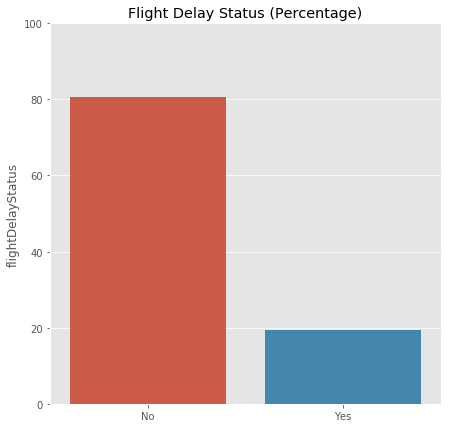

In [101]:
plt.figure(figsize = (7,7))

delayCountDf = pd.DataFrame(trainOriginWeatherData.flightDelayStatus.value_counts()/sum(trainOriginWeatherData.flightDelayStatus.value_counts())*100)
sns.barplot(delayCountDf.index,delayCountDf.flightDelayStatus).set_title('Flight Delay Status (Percentage)')

#Setting y limits
plt.ylim([0,100])
plt.show()

In [102]:
delayedFlightDetails = trainOriginWeatherData[trainOriginWeatherData['flightDelayStatus']=='Yes']

In [103]:
delayedFlightDetails['flightDelayStatus'].value_counts()

Yes    1519
Name: flightDelayStatus, dtype: int64

In [104]:
delayedFlightDetails.groupby('Month')['flightDelayStatus'].count()

Month
1      89
3     145
5     290
7     304
9     223
11    468
Name: flightDelayStatus, dtype: int64

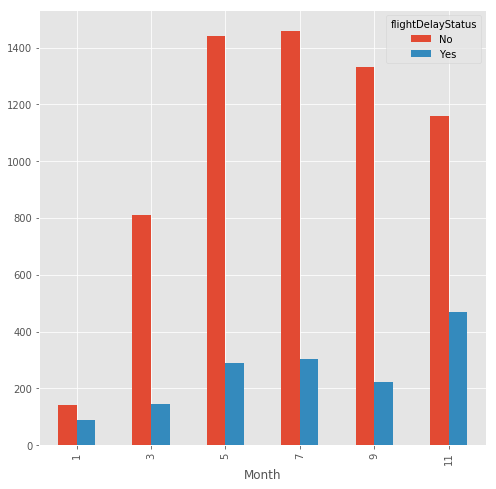

In [105]:
# Plotting Number of flight travels by month ( delayed/ Not delayed)
monthDelayTable = pd.crosstab(index = trainOriginWeatherData['Month'], columns= trainOriginWeatherData['flightDelayStatus'])
monthDelayTable.plot(kind="bar",figsize=(8,8),stacked=False)

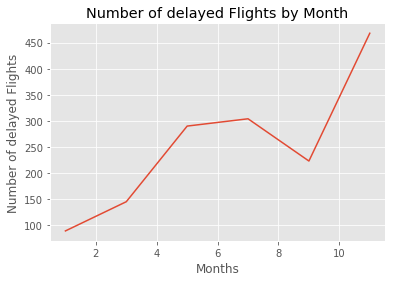

In [106]:
# Exploring the seasonal patterns in number of delays w.r.t month
matplotlib.style.use('ggplot') 
plt.plot(delayedFlightDetails.groupby('Month')['flightDelayStatus'].count())
plt.xlabel('Months', size = 12)
plt.ylabel('Number of delayed Flights', size = 12)
plt.title('Number of delayed Flights by Month')
plt.show()

In [107]:
dayToNameMapping = {1:'SUN',2:'MON',3:'TUE',4:'WED',5:'THU',6:'FRI',7:'SAT'}
def getWeekDayName(dayNumber):
    return dayToNameMapping.get(dayNumber)

In [108]:
delayedFlightDetails['DayOfWeek'] = delayedFlightDetails['DayOfWeek'].apply(getWeekDayName)

C:\Users\rvadamala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


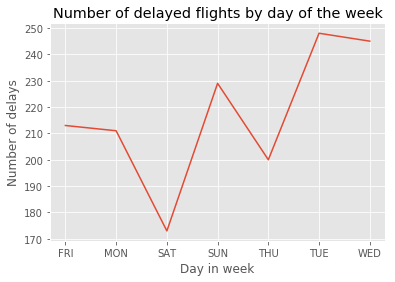

In [109]:
# Exploring the seasonal patterns in number of delays w.r.t hour of the day
matplotlib.style.use('ggplot') 
plt.plot(delayedFlightDetails.groupby('DayOfWeek')['flightDelayStatus'].count())
trainOriginWeatherData
plt.xlabel('Day in week', size = 12)
plt.ylabel('Number of delays', size = 12)
plt.title('Number of delayed flights by day of the week')
plt.show()

In [110]:
delayedFlightDetails.groupby('DayOfWeek')['flightDelayStatus'].count()

DayOfWeek
FRI    213
MON    211
SAT    173
SUN    229
THU    200
TUE    248
WED    245
Name: flightDelayStatus, dtype: int64

In [111]:
## Plotting Origin vs Number of Flights
flightRouteDelayTable = pd.crosstab(index = trainOriginWeatherData['Origin'], columns = trainOriginWeatherData['flightDelayStatus'],normalize="columns")\
                            .round(4)*100
flightRouteDelayTable = flightRouteDelayTable.sort_values('Yes', ascending=False)
OriginVsDelayDf = pd.DataFrame(flightRouteDelayTable)
OriginVsDelayDf.head(10)
OriginVsDelayDf = OriginVsDelayDf[OriginVsDelayDf['Yes']>1]
OriginVsDelayDf.shape


(20, 2)

Text(0,0.5,'Percentage of delays')

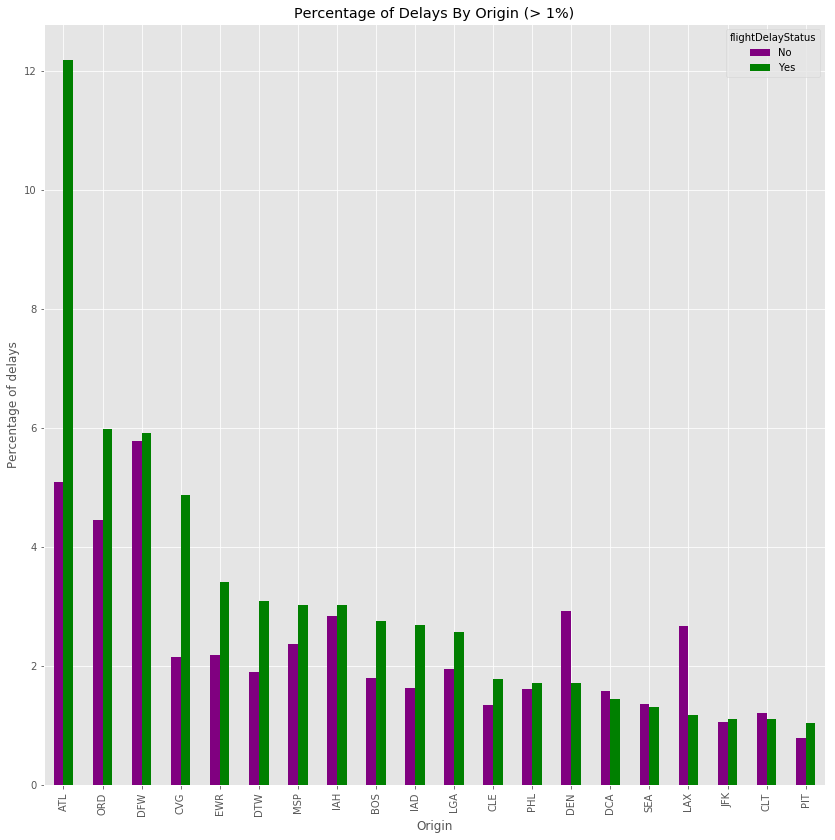

In [112]:
OriginVsDelayDf.plot(kind = "bar", title="Percentage of Delays By Origin (> 1%)",figsize= (14,14),color = ["purple","green"]).set_ylabel("Percentage of delays")

In [113]:
## Plotting Destination vs Number of Flights
flightRouteDelayTable = pd.crosstab(index = trainOriginWeatherData['Destination'], columns = trainOriginWeatherData['flightDelayStatus'],normalize="columns")\
                            .round(4)*100
flightRouteDelayTable = flightRouteDelayTable.sort_values('Yes', ascending=False)
DestVsDelayDf = pd.DataFrame(flightRouteDelayTable)
DestVsDelayDf.head(10)
DestVsDelayDf = DestVsDelayDf[DestVsDelayDf['Yes']>1]
DestVsDelayDf.shape

(26, 2)

Text(0,0.5,'Percentage of delays')

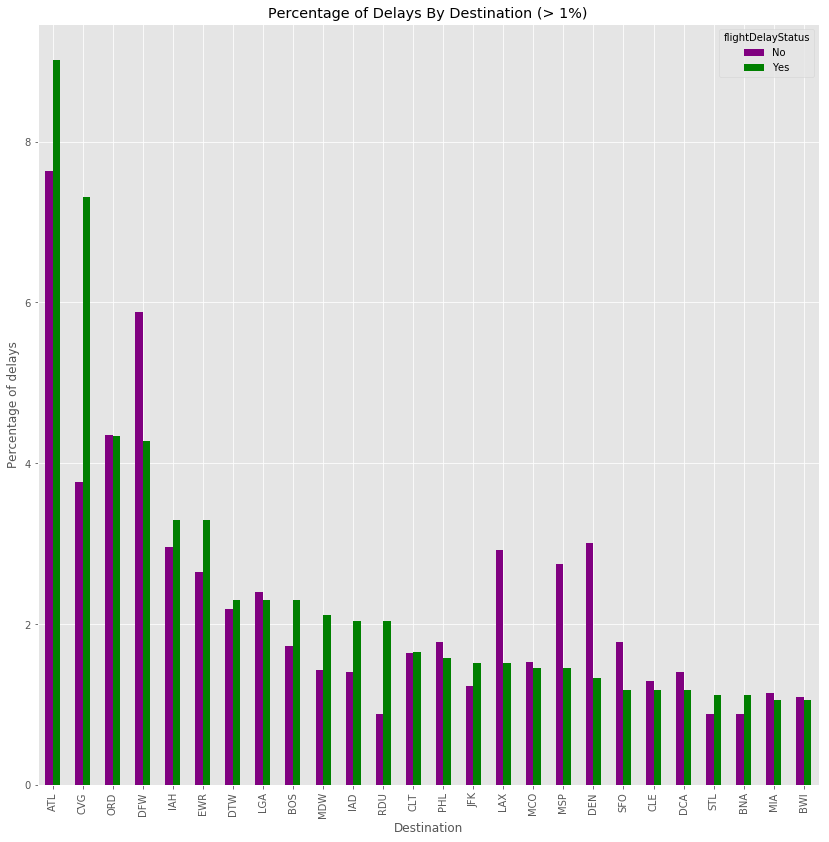

In [114]:
DestVsDelayDf.plot(kind = "bar", title="Percentage of Delays By Destination (> 1%)",figsize= (14,14),color = ["purple","green"]).set_ylabel("Percentage of delays")